# Perkenalan 

Nama / Batch = Sandika / 008

Data yang akan digunakan untuk Milestone 2 Phase 2 ini adalah :    

https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

data ini akan digunakan untuk mendeteksi mood wajah menggunakan metode CNN

https://colab.research.google.com/drive/1hF6m_AxdeXllxuj-h8XGBQOzGM0dWjUg?usp=sharing

Dashboard Heroku

https://sandika-milestone2.herokuapp.com/

# Import Pustaka

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.image as mpimg
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/MyDrive/images

/content/gdrive/MyDrive/images


In [ ]:
# cek
! pwd

/content/gdrive/MyDrive/images


# EDA

In [ ]:
# resize image menjadi 48
picture_size = 48
folder_path= '/content/gdrive/My Drive/images/'

In [ ]:
# eksplorasi direktori dataset
for dirpath, dirnames, filenames in os.walk('/content/gdrive/MyDrive/images/validation'):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 7 folder dan 0 gambar di direktori /content/gdrive/MyDrive/images/validation
Ada 0 folder dan 960 gambar di direktori /content/gdrive/MyDrive/images/validation/angry
Ada 0 folder dan 1216 gambar di direktori /content/gdrive/MyDrive/images/validation/neutral
Ada 0 folder dan 1825 gambar di direktori /content/gdrive/MyDrive/images/validation/happy
Ada 0 folder dan 1139 gambar di direktori /content/gdrive/MyDrive/images/validation/sad
Ada 0 folder dan 1018 gambar di direktori /content/gdrive/MyDrive/images/validation/fear
Ada 0 folder dan 797 gambar di direktori /content/gdrive/MyDrive/images/validation/surprise
Ada 0 folder dan 111 gambar di direktori /content/gdrive/MyDrive/images/validation/disgust


In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/gdrive/MyDrive/images/train'):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 7 folder dan 0 gambar di direktori /content/gdrive/MyDrive/images/train
Ada 0 folder dan 4982 gambar di direktori /content/gdrive/MyDrive/images/train/neutral
Ada 0 folder dan 4161 gambar di direktori /content/gdrive/MyDrive/images/train/sad
Ada 0 folder dan 3205 gambar di direktori /content/gdrive/MyDrive/images/train/surprise
Ada 0 folder dan 436 gambar di direktori /content/gdrive/MyDrive/images/train/disgust
Ada 0 folder dan 4103 gambar di direktori /content/gdrive/MyDrive/images/train/fear
Ada 0 folder dan 3993 gambar di direktori /content/gdrive/MyDrive/images/train/angry
Ada 0 folder dan 7164 gambar di direktori /content/gdrive/MyDrive/images/train/happy


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/gdrive/MyDrive/images/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


proses mencari tau kategori yang ada di dalam data

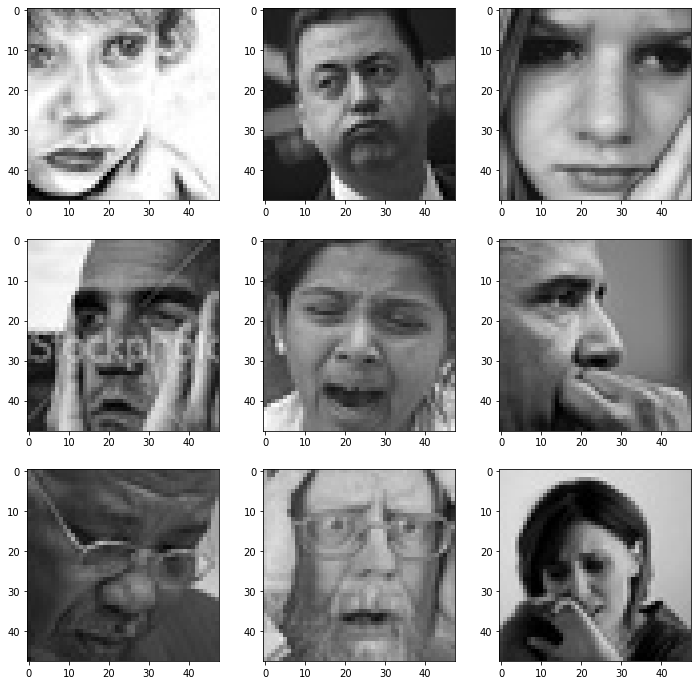

In [ ]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

memunculkan wajah dengan kategori 'sad'

# Data Preprocessing

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28044 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Training, Fit & Evaluation

In [ ]:
# proses pembuatan Arsitektur Data
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_36 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("./model.h5", monitor=metric, verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callback save best model only
epochs = 21

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

proses compiling model dengan membuat early stopping dimana proses fit akan berhenti apa bila akurasi tidak naik

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/21
219/219 [==============================] - ETA: 0s - loss: 1.8631 - accuracy: 0.2763
Epoch 1: val_accuracy improved from -inf to 0.25923, saving model to ./model.h5
219/219 [==============================] - 88s 388ms/step - loss: 1.8631 - accuracy: 0.2763 - val_loss: 2.0098 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/21
219/219 [==============================] - ETA: 0s - loss: 1.5736 - accuracy: 0.3946
Epoch 2: val_accuracy improved from 0.25923 to 0.34162, saving model to ./model.h5
219/219 [==============================] - 85s 387ms/step - loss: 1.5736 - accuracy: 0.3946 - val_loss: 1.8036 - val_accuracy: 0.3416 - lr: 0.0010
Epoch 3/21
219/219 [==============================] - ETA: 0s - loss: 1.4182 - accuracy: 0.4554
Epoch 3: val_accuracy improved from 0.34162 to 0.44446, saving model to ./model.h5
219/219 [==============================] - 84s 382ms/step - loss: 1.4182 - accuracy: 0.4554 - val_loss: 1.5378 - val_accuracy: 0.4445 - lr: 0.0010
Epoch 4/21
219/219 [=====

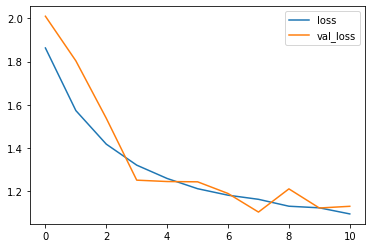

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

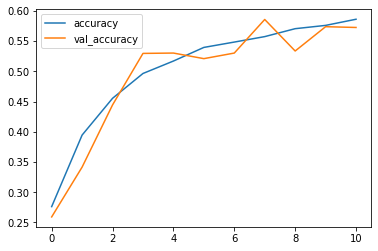

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

terjadi overfit di dalam data

# Model Inference

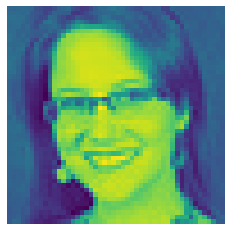

In [ ]:
new_img = mpimg.imread('/content/7.jpg')
plt.imshow(new_img);
plt.axis(False);

In [ ]:
def load_and_preprocess(filename, img_shape=48):
  img = read_file(filename)
  img = decode_image(img, channels=1)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
new_img = load_and_preprocess('/content/7.jpg')
new_img.shape

TensorShape([48, 48, 1])

In [ ]:
from tensorflow import expand_dims
# benerin dimensi
new_img = expand_dims(new_img, axis=0)
new_img.shape

TensorShape([1, 48, 48, 1])

In [ ]:
res = model.predict(new_img)
res.argmax()

3

In [ ]:
train_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
tf.keras.models.save_model(model,'depmodel.hdf5')

# Kesimpulan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Analisis EDA**

1. Terdapat 7 kategori didalam data yaitu ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']

2. 
- Data Train terdiri dari 28044 gambar.
- Data Test terdiri dari 28044 gambar.

**Analisis Model**
1. Data bersifat tidak stabil dikarenakan setiap dilakukan run ulang akurasi dari model berubah ubah 

2. val_accuracy: 0.5726 dan accuracy: 0.5862

3. Model terdiri dari 4 layers dan 2 connected layers

4. Pemodelan masih bisa dilakukan lebih baik apabila didukung perangkat yang cukup memadai

5. Model akan menjadi lebih stabil apabila data yang digunakan lebih baik

6. Model Improvement yang dilakukan adalah data_augmentation, batchnormalization, dropout untuk mencegah model untuk overfitting.